# **Individual Assingment**: Default Credit Cards Clients

A bank in you region want to build a model to predict credit card defaulters more accurately in order minimize money loss. For this task we have a set of data on default payments and demographic data to help us do our task. Data is comprised in the following CSV files:


**TRAINING**

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years
 
**`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)
 
**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)
 
 
**TEST** (For PART 3)
 - **`test_data.csv`**
 
**SUBMISSION** (For PART 3)
 - **`submission_features.csv`**
 
**BACKUP**
 - **`train_data.csv`**

Load all data and answer the following questions

## **A. DATA ENGINEERING (3 points)**

### **Question 1**

(2 points)

In [1]:
# load all the csvs 
import pandas as pd
train = pd.read_csv('train_data.csv')
target = pd.read_csv('train_target.csv')
series = pd.read_csv('train_series.csv')
customers = pd.read_csv('train_customers.csv')
test = pd.read_csv('test_data.csv')

merge series, customers, and target. 

In [2]:
# create the pivot table
series.head()

,ID,MONTH,PAY,BILL_AMT,PAY_AMT
0,9910,JUNE,0.0,76885.0,3500.0
1,9910,MAY,0.0,79106.0,4000.0
2,9910,APRIL,0.0,81231.0,3000.0
3,9910,MARCH,0.0,81983.0,3146.0
4,9910,FEBRUARY,0.0,83773.0,3260.0


In [3]:
# build one column for pay, bill_amt, pay_amt for each month 
series_pivot = series.pivot_table(index='ID', columns='MONTH', values=['PAY_AMT', 'BILL_AMT', 'PAY_AMT'])
series_pivot.head()

BILL_AMT                                                     PAY  \
MONTH     APRIL  FEBRUARY   JANUARY      JUNE     MARCH       MAY APRIL   
ID                                                                        
0       13600.0   44024.0   18697.0   28991.0       0.0   24391.0   0.0   
1       53169.0   50372.0   49470.0   75662.0   50875.0   70073.0   0.0   
2      161487.0  168094.0  170922.0  155910.0  157577.0  158819.0   2.0   
3           0.0       0.0       0.0   23570.0       0.0     735.0  -2.0   
4        9044.0    9417.0    9617.0    8214.0    9225.0    8034.0   0.0   

                                       PAY_AMT                            \
MONTH FEBRUARY JANUARY JUNE MARCH  MAY   APRIL FEBRUARY  JANUARY    JUNE   
ID                                                                         
0         -1.0     0.0 -1.0   0.0  0.0     0.0    680.0  10000.0  1300.0   
1          0.0     0.0  0.0   0.0  0.0  2000.0   1903.0   2006.0  3212.0   
2          2.0     2.0  2.0   2.0  2.0     0.0   5500.0   1000.0  6800.0   
3         -2.0    -2.0 -2.0  -2.0 -2.0     0.0      0.0      0.0   742.0   
4          0.0     0.0  0.0   0.0  0.0   331.0    356.0    330.0  1140.0   

                        
MONTH    MARCH     MAY  
ID                      
0      22373.0  1000.0  
1       1603.0  2106.0  
2      13000.0  6500.0  
3          0.0     0.0  
4        341.0  1150.0

In [4]:
# create a new column for the pay, bill_amt, pay_amt for each month
series_pivot.columns = ['_'.join(col).strip() for col in series_pivot.columns.values]
series_pivot.head()

,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
ID,,,,,,,,,,,,,,,,,,
0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,680.0,10000.0,1300.0,22373.0,1000.0
1,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1903.0,2006.0,3212.0,1603.0,2106.0
2,161487.0,168094.0,170922.0,155910.0,157577.0,158819.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,5500.0,1000.0,6800.0,13000.0,6500.0
3,0.0,0.0,0.0,23570.0,0.0,735.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,742.0,0.0,0.0
4,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0,356.0,330.0,1140.0,341.0,1150.0


### **Question 2**

(0.5 points)

In [5]:
customers.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,9910,130000.0,2,2,1,27
1,15561,60000.0,2,3,1,48
2,23607,330000.0,2,1,2,44
3,6314,60000.0,2,2,2,24
4,27534,180000.0,2,1,2,33


In [6]:
# combine customers and series_pivot
customers_series = pd.merge(customers, series_pivot, on='ID')
customers_series.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,9910,130000.0,2,2,1,27,81231.0,83773.0,85532.0,76885.0,...,0.0,0.0,0.0,0.0,3000.0,3260.0,3200.0,3500.0,3146.0,4000.0
1,15561,60000.0,2,3,1,48,8422.0,3910.0,2431.0,4823.0,...,-1.0,-1.0,-1.0,-1.0,4377.0,2431.0,2120.0,5491.0,3918.0,9683.0
2,23607,330000.0,2,1,2,44,253863.0,262753.0,268145.0,243621.0,...,0.0,0.0,0.0,0.0,9400.0,9766.0,9786.0,21400.0,9542.0,0.0
3,6314,60000.0,2,2,2,24,15069.0,5879.0,-2879.0,29832.0,...,0.0,0.0,0.0,0.0,1000.0,1329.0,41378.0,1538.0,118.0,1308.0
4,27534,180000.0,2,1,2,33,178.0,0.0,1118.0,4500.0,...,-1.0,-2.0,-1.0,-2.0,1500.0,1118.0,1331.0,2580.0,0.0,178.0


### **Question 3**

(0.5 points)

In [7]:
target.head()

,ID,DEFAULT_JULY
0,9910,0
1,15561,1
2,23607,1
3,6314,0
4,27534,0


In [8]:
# combine customers_series and target
customers_series_target = pd.merge(customers_series, target, on='ID')
customers_series_target.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,9910,130000.0,2,2,1,27,81231.0,83773.0,85532.0,76885.0,...,0.0,0.0,0.0,3000.0,3260.0,3200.0,3500.0,3146.0,4000.0,0
1,15561,60000.0,2,3,1,48,8422.0,3910.0,2431.0,4823.0,...,-1.0,-1.0,-1.0,4377.0,2431.0,2120.0,5491.0,3918.0,9683.0,1
2,23607,330000.0,2,1,2,44,253863.0,262753.0,268145.0,243621.0,...,0.0,0.0,0.0,9400.0,9766.0,9786.0,21400.0,9542.0,0.0,1
3,6314,60000.0,2,2,2,24,15069.0,5879.0,-2879.0,29832.0,...,0.0,0.0,0.0,1000.0,1329.0,41378.0,1538.0,118.0,1308.0,0
4,27534,180000.0,2,1,2,33,178.0,0.0,1118.0,4500.0,...,-2.0,-1.0,-2.0,1500.0,1118.0,1331.0,2580.0,0.0,178.0,0


In [215]:
# save the df to csv 
customers_series_target.to_csv('A_train.csv')

## **B. EXPLORATORY DATA ANALYSIS (2 points)**

In [9]:
customers_series_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20000 non-null  int64  
 1   LIMIT_BAL          20000 non-null  float64
 2   SEX                20000 non-null  int64  
 3   EDUCATION          20000 non-null  int64  
 4   MARRIAGE           20000 non-null  int64  
 5   AGE                20000 non-null  int64  
 6   BILL_AMT_APRIL     20000 non-null  float64
 7   BILL_AMT_FEBRUARY  20000 non-null  float64
 8   BILL_AMT_JANUARY   20000 non-null  float64
 9   BILL_AMT_JUNE      20000 non-null  float64
 10  BILL_AMT_MARCH     20000 non-null  float64
 11  BILL_AMT_MAY       20000 non-null  float64
 12  PAY_APRIL          20000 non-null  float64
 13  PAY_FEBRUARY       20000 non-null  float64
 14  PAY_JANUARY        20000 non-null  float64
 15  PAY_JUNE           20000 non-null  float64
 16  PAY_MARCH          200

In [10]:
# compare our table with the train_data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          20000 non-null  int64  
 1   LIMIT_BAL                   20000 non-null  float64
 2   SEX                         20000 non-null  int64  
 3   EDUCATION                   20000 non-null  int64  
 4   MARRIAGE                    20000 non-null  int64  
 5   AGE                         20000 non-null  int64  
 6   PAY_1                       20000 non-null  int64  
 7   PAY_2                       20000 non-null  int64  
 8   PAY_3                       20000 non-null  int64  
 9   PAY_4                       20000 non-null  int64  
 10  PAY_5                       20000 non-null  int64  
 11  PAY_6                       20000 non-null  int64  
 12  BILL_AMT1                   20000 non-null  float64
 13  BILL_AMT2                   200

In [11]:
customers_series_target.shape

(20000, 25)

In [12]:
train.shape

(20000, 25)

In [13]:
customers_series_target.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
count,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,2.000000e+04,20000.000000
mean,14940.65875,167954.600000,1.60580,1.853850,1.550050,35.494300,4.714778e+04,40432.998300,38993.697650,51455.534050,...,-0.017500,-0.22555,-0.134550,5336.185100,4826.740350,5063.527050,5732.43835,4903.173400,5.869932e+03,0.221000
std,8652.81960,129789.561234,0.48869,0.791847,0.522215,9.230733,6.985777e+04,60997.393453,59870.487622,74144.629562,...,1.121453,1.16488,1.194955,18686.860416,15596.035022,16349.170961,16938.48685,16189.314581,2.326906e+04,0.414931
min,0.00000,10000.000000,1.00000,0.000000,0.000000,21.000000,-1.572640e+05,-81334.000000,-73895.000000,-165580.000000,...,-2.000000,-2.00000,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000
25%,7460.75000,50000.000000,1.00000,1.000000,1.000000,28.000000,2.669500e+03,1816.500000,1280.000000,3581.000000,...,-1.000000,-1.00000,-1.000000,396.000000,290.750000,158.000000,999.75000,307.000000,8.345000e+02,0.000000
50%,14952.50000,140000.000000,2.00000,2.000000,2.000000,34.000000,2.031250e+04,18336.000000,17172.000000,22483.000000,...,0.000000,0.00000,0.000000,1820.000000,1500.000000,1500.000000,2102.00000,1500.000000,2.011000e+03,0.000000
75%,22439.50000,240000.000000,2.00000,2.000000,2.000000,41.250000,5.985125e+04,50229.750000,49075.500000,67414.750000,...,0.000000,0.00000,0.000000,4598.000000,4036.250000,4000.000000,5025.00000,4054.250000,5.000000e+03,0.000000
max,29999.00000,1000000.000000,2.00000,6.000000,3.000000,79.000000,1.664089e+06,927171.000000,961664.000000,964511.000000,...,8.000000,8.00000,7.000000,896040.000000,426529.000000,443001.000000,873552.00000,621000.000000,1.684259e+06,1.000000


In [14]:
train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,...,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,14940.65875,167954.600000,1.60580,1.853850,1.550050,35.494300,-0.017500,-0.134550,-0.16615,-0.22555,...,43453.546450,40432.998300,38993.697650,5732.43835,5.869932e+03,5336.185100,4903.173400,4826.740350,5063.527050,0.221000
std,8652.81960,129789.561234,0.48869,0.791847,0.522215,9.230733,1.121453,1.194955,1.19671,1.16488,...,64651.193334,60997.393453,59870.487622,16938.48685,2.326906e+04,18686.860416,16189.314581,15596.035022,16349.170961,0.414931
min,0.00000,10000.000000,1.00000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.00000,-2.00000,...,-170000.000000,-81334.000000,-73895.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7460.75000,50000.000000,1.00000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.00000,-1.00000,...,2400.000000,1816.500000,1280.000000,999.75000,8.345000e+02,396.000000,307.000000,290.750000,158.000000,0.000000
50%,14952.50000,140000.000000,2.00000,2.000000,2.000000,34.000000,0.000000,0.000000,0.00000,0.00000,...,19171.500000,18336.000000,17172.000000,2102.00000,2.011000e+03,1820.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22439.50000,240000.000000,2.00000,2.000000,2.000000,41.250000,0.000000,0.000000,0.00000,0.00000,...,54558.500000,50229.750000,49075.500000,5025.00000,5.000000e+03,4598.000000,4054.250000,4036.250000,4000.000000,0.000000
max,29999.00000,1000000.000000,2.00000,6.000000,3.000000,79.000000,8.000000,7.000000,8.00000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.00000,1.684259e+06,896040.000000,621000.000000,426529.000000,443001.000000,1.000000


the two data frames look to be the same. 

In [15]:
customers_series_target.isnull().sum()

ID                   0
LIMIT_BAL            0
SEX                  0
EDUCATION            0
MARRIAGE             0
AGE                  0
BILL_AMT_APRIL       0
BILL_AMT_FEBRUARY    0
BILL_AMT_JANUARY     0
BILL_AMT_JUNE        0
BILL_AMT_MARCH       0
BILL_AMT_MAY         0
PAY_APRIL            0
PAY_FEBRUARY         0
PAY_JANUARY          0
PAY_JUNE             0
PAY_MARCH            0
PAY_MAY              0
PAY_AMT_APRIL        0
PAY_AMT_FEBRUARY     0
PAY_AMT_JANUARY      0
PAY_AMT_JUNE         0
PAY_AMT_MARCH        0
PAY_AMT_MAY          0
DEFAULT_JULY         0
dtype: int64

In [16]:
customers_series_target.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
count,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,2.000000e+04,20000.000000
mean,14940.65875,167954.600000,1.60580,1.853850,1.550050,35.494300,4.714778e+04,40432.998300,38993.697650,51455.534050,...,-0.017500,-0.22555,-0.134550,5336.185100,4826.740350,5063.527050,5732.43835,4903.173400,5.869932e+03,0.221000
std,8652.81960,129789.561234,0.48869,0.791847,0.522215,9.230733,6.985777e+04,60997.393453,59870.487622,74144.629562,...,1.121453,1.16488,1.194955,18686.860416,15596.035022,16349.170961,16938.48685,16189.314581,2.326906e+04,0.414931
min,0.00000,10000.000000,1.00000,0.000000,0.000000,21.000000,-1.572640e+05,-81334.000000,-73895.000000,-165580.000000,...,-2.000000,-2.00000,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000
25%,7460.75000,50000.000000,1.00000,1.000000,1.000000,28.000000,2.669500e+03,1816.500000,1280.000000,3581.000000,...,-1.000000,-1.00000,-1.000000,396.000000,290.750000,158.000000,999.75000,307.000000,8.345000e+02,0.000000
50%,14952.50000,140000.000000,2.00000,2.000000,2.000000,34.000000,2.031250e+04,18336.000000,17172.000000,22483.000000,...,0.000000,0.00000,0.000000,1820.000000,1500.000000,1500.000000,2102.00000,1500.000000,2.011000e+03,0.000000
75%,22439.50000,240000.000000,2.00000,2.000000,2.000000,41.250000,5.985125e+04,50229.750000,49075.500000,67414.750000,...,0.000000,0.00000,0.000000,4598.000000,4036.250000,4000.000000,5025.00000,4054.250000,5.000000e+03,0.000000
max,29999.00000,1000000.000000,2.00000,6.000000,3.000000,79.000000,1.664089e+06,927171.000000,961664.000000,964511.000000,...,8.000000,8.00000,7.000000,896040.000000,426529.000000,443001.000000,873552.00000,621000.000000,1.684259e+06,1.000000


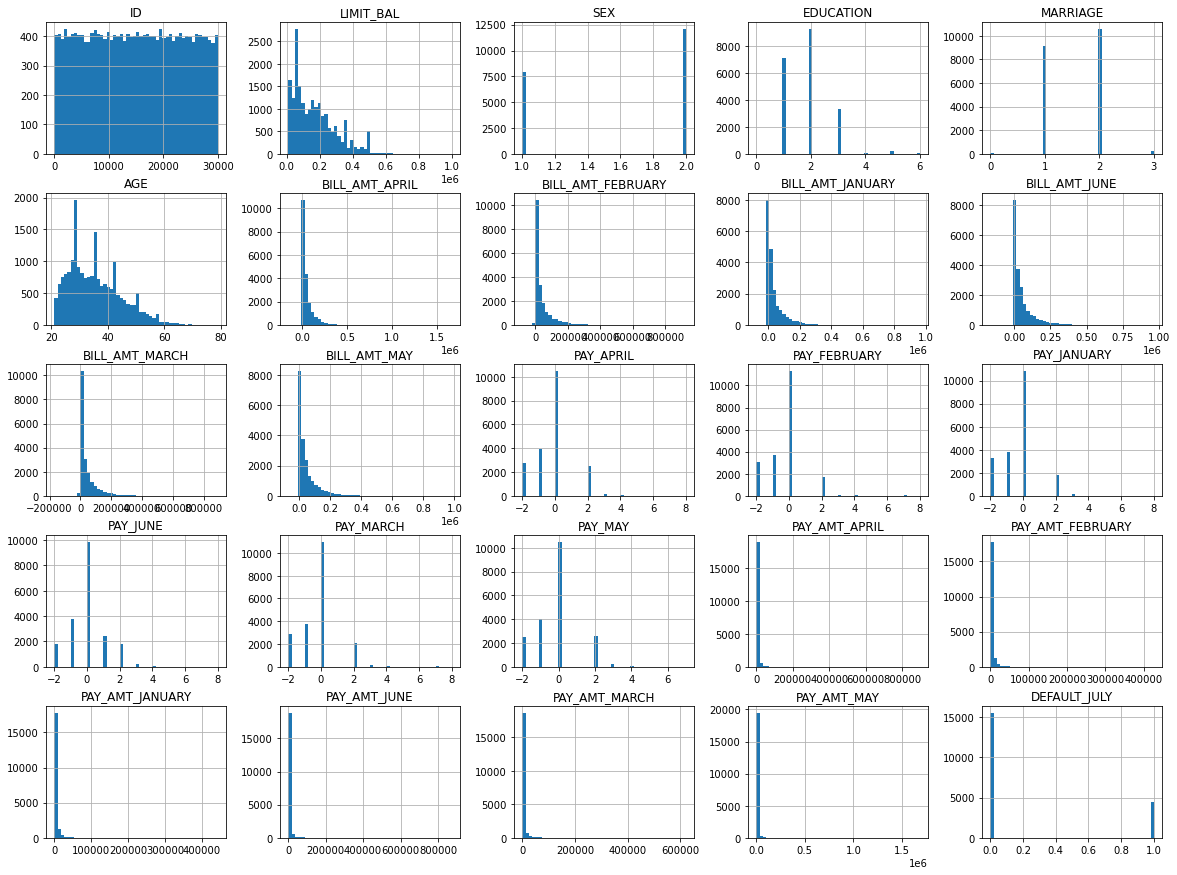

In [17]:
import matplotlib.pyplot as plt
customers_series_target.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:ylabel='DEFAULT_JULY'>

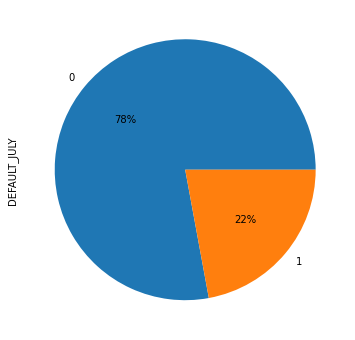

In [18]:
# create a pie chart for the target
customers_series_target['DEFAULT_JULY'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6))

imbalanced distribution because only 22% are defaulters.

In [19]:
# check the education level of default_july == 1 
customers_series_target[customers_series_target['DEFAULT_JULY']==1]['EDUCATION'].value_counts()

2    2225
1    1336
3     836
5      15
4       6
6       2
Name: EDUCATION, dtype: int64

### Question 4

Text(0.5, 1.0, 'Defaults group by Education Level')

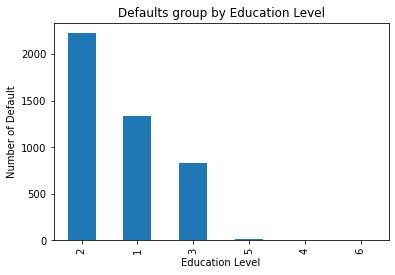

In [20]:
# plot the education level of default_july == 1
default_education = customers_series_target[customers_series_target['DEFAULT_JULY']==1]['EDUCATION'].value_counts().plot(kind='bar')
default_education.set_xlabel('Education Level')
default_education.set_ylabel('Number of Default')
default_education.set_title('Defaults group by Education Level')

In [21]:
# check the LIMIT_BAL
customers_series_target['LIMIT_BAL'].value_counts()

50000.0      2244
20000.0      1309
30000.0      1085
80000.0      1022
200000.0      986
             ... 
800000.0        1
720000.0        1
690000.0        1
1000000.0       1
780000.0        1
Name: LIMIT_BAL, Length: 79, dtype: int64

Text(0.5, 1.0, 'Defaults group by LIMIT_BAL')

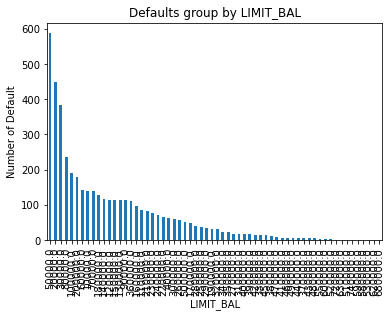

In [22]:
# plot the LIMIT_BAL of default_july == 1
default_limit_bal = customers_series_target[customers_series_target['DEFAULT_JULY']==1]['LIMIT_BAL'].value_counts().plot(kind='bar')
default_limit_bal.set_xlabel('LIMIT_BAL')
default_limit_bal.set_ylabel('Number of Default')
default_limit_bal.set_title('Defaults group by LIMIT_BAL')

the higher the credit, the lower the default

### Question 5


<AxesSubplot:title={'center':'LIMIT_BAL'}, xlabel='DEFAULT_JULY'>

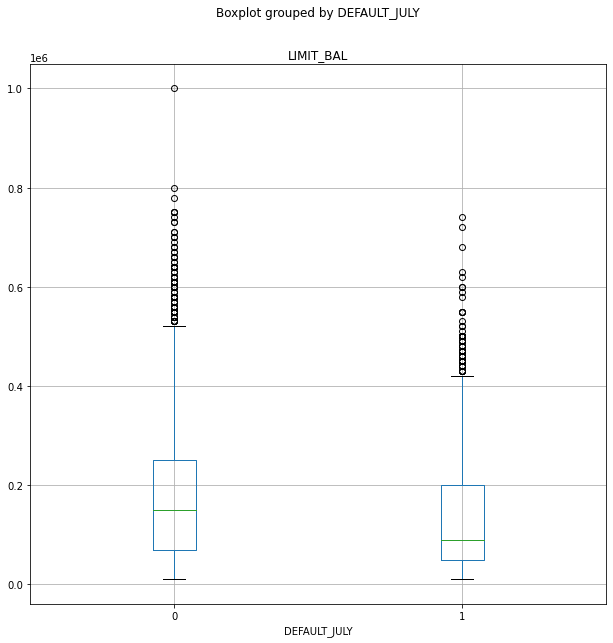

In [23]:
# illustrate limit_bal of default_july == 1 and default_july == 0 with boxplot
customers_series_target.boxplot(column='LIMIT_BAL', by='DEFAULT_JULY', figsize=(10,10))

we can see that for the defaulters the credit median is lower than the non defaulter and the dispersion of credit is smaller. 

In [24]:
customers_series_target.LIMIT_BAL.describe()

count      20000.000000
mean      167954.600000
std       129789.561234
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [25]:
customers_series_target['EDUCATION'].value_counts()

2    9290
1    7085
3    3308
5     182
4      95
6      33
0       7
Name: EDUCATION, dtype: int64

In [26]:
customers_series_target['EDUCATION'].describe()

count    20000.000000
mean         1.853850
std          0.791847
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64

### Question 6

<AxesSubplot:>

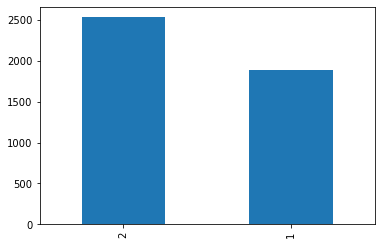

In [27]:
# create a plot of defaulters groupby sex 
customers_series_target[customers_series_target['DEFAULT_JULY'] ==1]['SEX'].value_counts().plot(kind='bar')


<AxesSubplot:>

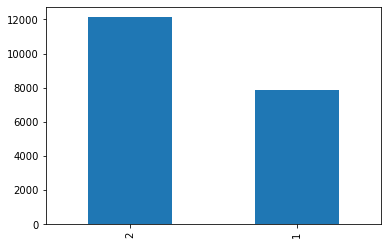

In [28]:
# plot the sex with a pie chart
customers_series_target['SEX'].value_counts().plot(kind='bar')

In [29]:
default_by_sex = customers_series_target.groupby('SEX').mean()['DEFAULT_JULY']

we can see that in this dataset, female credit card users seem to have a higher number of defaults than male users. However, female credit card holders occupy a larger portion of our dataset. If calculated, in percentage, males have a higher chance on defaulting than females. However, the difference is too small to be taken into account.

Text(0.5, 1.0, 'Defaults group by Marriage Status')

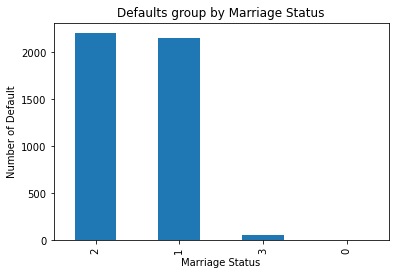

In [30]:
# plot the marriage status of default_july == 1
default_marriage = customers_series_target[customers_series_target['DEFAULT_JULY']==1]['MARRIAGE'].value_counts().plot(kind='bar')
default_marriage.set_xlabel('Marriage Status')
default_marriage.set_ylabel('Number of Default')
default_marriage.set_title('Defaults group by Marriage Status')

<AxesSubplot:>

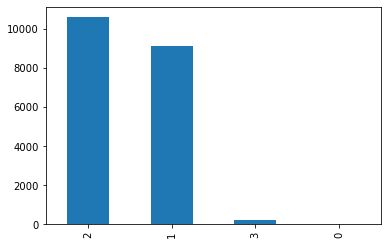

In [31]:
# plot the marriage status 
customers_series_target['MARRIAGE'].value_counts().plot(kind='bar')

it seems like in our sample data, the number of default does not really differ based on the marriage status. 


In [32]:
# groupby marriage status and default_july
customers_series_target.groupby(['MARRIAGE', 'DEFAULT_JULY']).size()

MARRIAGE  DEFAULT_JULY
0         0                 32
          1                  4
1         0               6991
          1               2152
2         0               8402
          1               2203
3         0                155
          1                 61
dtype: int64

In [33]:
#calculate the percentage of defaulters groupby marriage status
customers_series_target.groupby(['MARRIAGE', 'DEFAULT_JULY']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

MARRIAGE  DEFAULT_JULY
0         0               88.888889
          1               11.111111
1         0               76.462868
          1               23.537132
2         0               79.226780
          1               20.773220
3         0               71.759259
          1               28.240741
dtype: float64

In [34]:
# groupby age and default_july
customers_series_target.groupby(['AGE', 'DEFAULT_JULY']).size()

AGE  DEFAULT_JULY
21   0                35
     1                 8
22   0               270
     1               115
23   0               472
                    ... 
73   0                 1
     1                 1
75   0                 1
     1                 1
79   0                 1
Length: 107, dtype: int64

In [35]:
# calculate the percentage of defaulters groupby age
customers_series_target.groupby(['AGE', 'DEFAULT_JULY']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

AGE  DEFAULT_JULY
21   0                81.395349
     1                18.604651
22   0                70.129870
     1                29.870130
23   0                73.291925
                        ...    
73   0                50.000000
     1                50.000000
75   0                50.000000
     1                50.000000
79   0               100.000000
Length: 107, dtype: float64

Text(0.5, 1.0, 'Defaults group by Age')

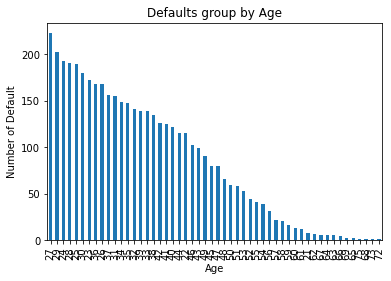

In [36]:
# plot the age of default_july == 1
default_age = customers_series_target[customers_series_target['DEFAULT_JULY']==1]['AGE'].value_counts().plot(kind='bar')
default_age.set_xlabel('Age')
default_age.set_ylabel('Number of Default')
default_age.set_title('Defaults group by Age')

<AxesSubplot:>

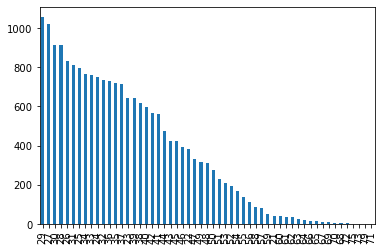

In [37]:
# plot the age 
customers_series_target['AGE'].value_counts().plot(kind='bar')

In [38]:
# calculate the percentage of defaulters groupby age
customers_series_target.groupby(['AGE', 'DEFAULT_JULY']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

AGE  DEFAULT_JULY
21   0                81.395349
     1                18.604651
22   0                70.129870
     1                29.870130
23   0                73.291925
                        ...    
73   0                50.000000
     1                50.000000
75   0                50.000000
     1                50.000000
79   0               100.000000
Length: 107, dtype: float64

<AxesSubplot:xlabel='AGE,DEFAULT_JULY'>

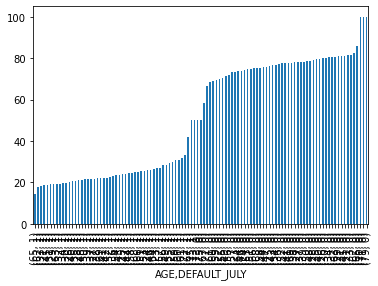

In [39]:
# plot the percentage of defaulters groupby age
customers_series_target.groupby(['AGE', 'DEFAULT_JULY']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).sort_values(ascending=True).plot(kind='bar')

seems like the number of defaults decreases as age increases, but looking at the percentage of defaults, the highest occur at the age group 73 and 75. 

In [40]:
# isolate the numeric columns
customers_series_target_numeric = customers_series_target.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT_JULY', 'PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_APRIL', 'PAY_JUNE', 'PAY_MARCH', 'PAY_MAY'], axis=1)
customers_series_target_numeric.head()

,LIMIT_BAL,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,130000.0,27,81231.0,83773.0,85532.0,76885.0,81983.0,79106.0,3000.0,3260.0,3200.0,3500.0,3146.0,4000.0
1,60000.0,48,8422.0,3910.0,2431.0,4823.0,4377.0,5471.0,4377.0,2431.0,2120.0,5491.0,3918.0,9683.0
2,330000.0,44,253863.0,262753.0,268145.0,243621.0,257535.0,259517.0,9400.0,9766.0,9786.0,21400.0,9542.0,0.0
3,60000.0,24,15069.0,5879.0,-2879.0,29832.0,15761.0,18628.0,1000.0,1329.0,41378.0,1538.0,118.0,1308.0
4,180000.0,33,178.0,0.0,1118.0,4500.0,1500.0,2580.0,1500.0,1118.0,1331.0,2580.0,0.0,178.0


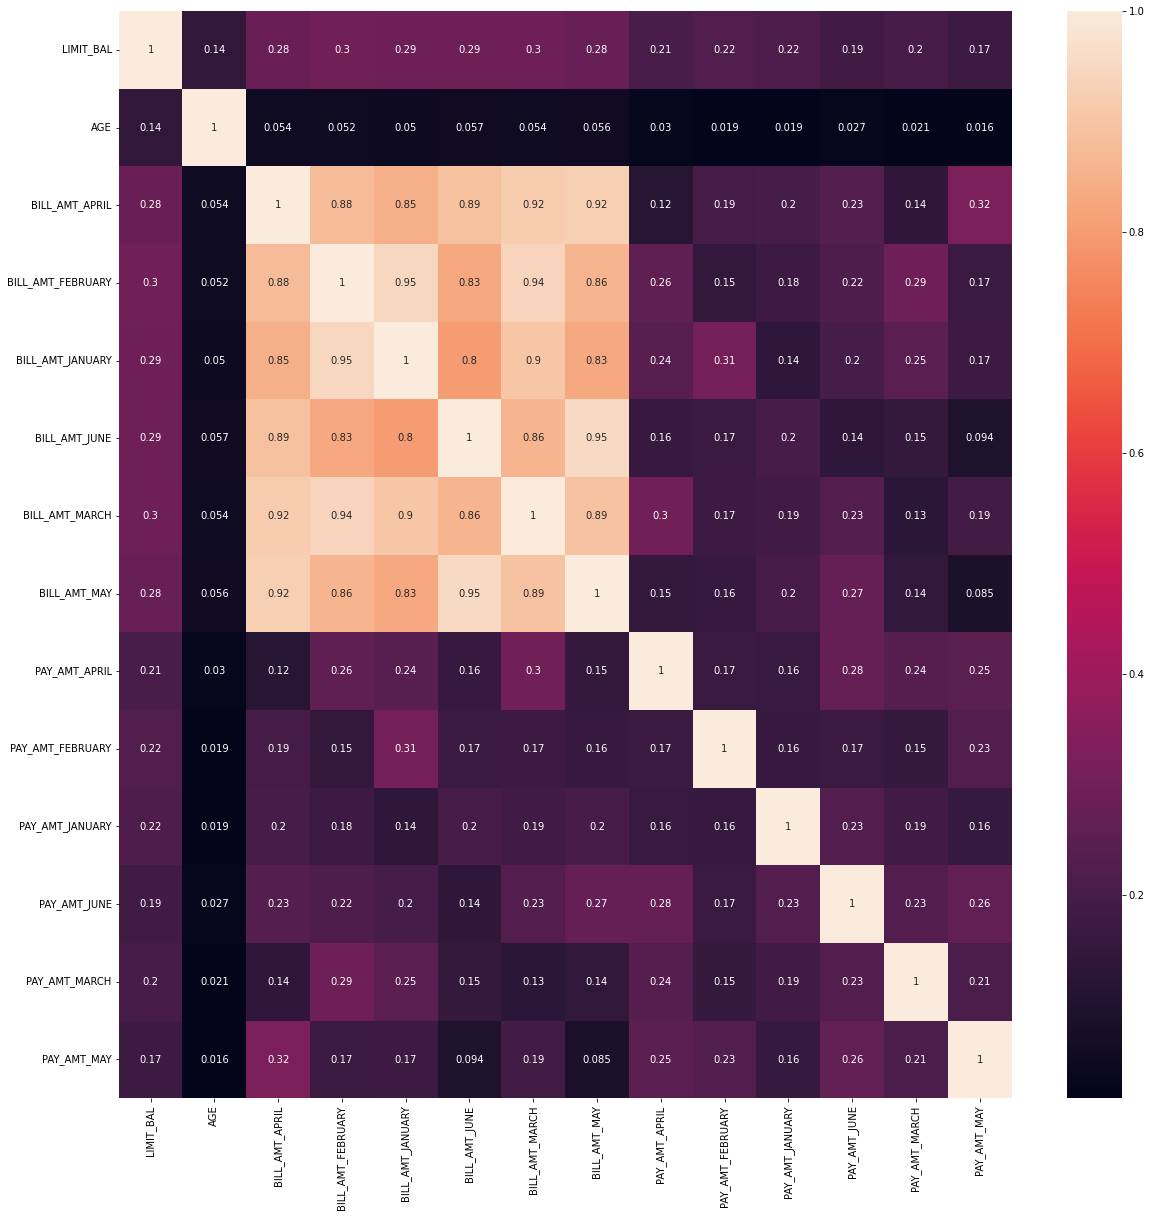

In [41]:
# create a correlation matrix with the numeric columns
import seaborn as sns
sns.heatmap(customers_series_target_numeric.corr(), annot=True).figure.set_size_inches(20,20)

age has a low correlation with other variables, maybe convert it into age groups

## **C. MACHINE LEARNING (5 points)**

In [42]:
# import the test data
import pandas as pd
test = pd.read_csv('test_data.csv')

In [43]:
train = pd.read_csv('train_data.csv')

In [44]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,9910,130000.0,2,2,1,27,0,0,0,0,...,81983.0,83773.0,85532.0,3500.0,4000.0,3000.0,3146.0,3260.0,3200.0,0
1,15561,60000.0,2,3,1,48,-1,-1,-1,-1,...,4377.0,3910.0,2431.0,5491.0,9683.0,4377.0,3918.0,2431.0,2120.0,1
2,23607,330000.0,2,1,2,44,0,0,2,0,...,257535.0,262753.0,268145.0,21400.0,0.0,9400.0,9542.0,9766.0,9786.0,1
3,6314,60000.0,2,2,2,24,0,0,0,0,...,15761.0,5879.0,-2879.0,1538.0,1308.0,1000.0,118.0,1329.0,41378.0,0
4,27534,180000.0,2,1,2,33,-2,-2,-1,-1,...,1500.0,0.0,1118.0,2580.0,178.0,1500.0,0.0,1118.0,1331.0,0


In [45]:
customers_series_target.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,9910,130000.0,2,2,1,27,81231.0,83773.0,85532.0,76885.0,...,0.0,0.0,0.0,3000.0,3260.0,3200.0,3500.0,3146.0,4000.0,0
1,15561,60000.0,2,3,1,48,8422.0,3910.0,2431.0,4823.0,...,-1.0,-1.0,-1.0,4377.0,2431.0,2120.0,5491.0,3918.0,9683.0,1
2,23607,330000.0,2,1,2,44,253863.0,262753.0,268145.0,243621.0,...,0.0,0.0,0.0,9400.0,9766.0,9786.0,21400.0,9542.0,0.0,1
3,6314,60000.0,2,2,2,24,15069.0,5879.0,-2879.0,29832.0,...,0.0,0.0,0.0,1000.0,1329.0,41378.0,1538.0,118.0,1308.0,0
4,27534,180000.0,2,1,2,33,178.0,0.0,1118.0,4500.0,...,-2.0,-1.0,-2.0,1500.0,1118.0,1331.0,2580.0,0.0,178.0,0


prepare the data

In [46]:
# convert age to age groups
customers_series_target['AGE'] = pd.cut(customers_series_target['AGE'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])


In [47]:
# convert age using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customers_series_target['AGE'] = le.fit_transform(customers_series_target['AGE'])


In [48]:
x = customers_series_target.drop(['ID', 'DEFAULT_JULY'], axis=1)
y = customers_series_target['DEFAULT_JULY']

In [49]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
# import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [51]:
# create a random forest classifier
rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
model_rf = rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)

In [52]:
# calculate the roc_auc_score
roc_auc_score(y_test, y_pred)

0.666116127191097

In [53]:
# try with xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=300, max_depth=10, random_state=42)
model_xgb = xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)


In [54]:
# get the roc auc score
roc_auc_score(y_test, y_pred)

0.6579308286774993

In [55]:
# get the feature importance
feature_importance = pd.DataFrame({'feature': x_train.columns, 'importance': model_xgb.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
14,PAY_JUNE,0.248547
16,PAY_MAY,0.129969
12,PAY_FEBRUARY,0.039167
15,PAY_MARCH,0.036840
11,PAY_APRIL,0.036666
13,PAY_JANUARY,0.035893
17,PAY_AMT_APRIL,0.031956
8,BILL_AMT_JUNE,0.030612
5,BILL_AMT_APRIL,0.029556
19,PAY_AMT_JANUARY,0.029168


In [ ]:
# try to improve the model by tuning the hyperparameters
from sklearn.model_selection import GridSearchCV
paramas = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(estimator=xgb, param_grid=paramas, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

In [ ]:
# print the best parameters
grid_search.best_params_

In [ ]:
# try with the best parameters
xgb = XGBClassifier(n_estimators=500, max_depth=2, random_state=42)
model_xgb = xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)

In [ ]:
# get the roc auc score
roc_auc_score(y_test, y_pred)

drop the features that have the lowest importance

In [57]:
x = customers_series_target.drop(['ID', 'SEX', 'MARRIAGE', 'EDUCATION', 'AGE', 'DEFAULT_JULY'], axis=1)
y = customers_series_target['DEFAULT_JULY']

In [59]:
x.head()

,LIMIT_BAL,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,130000.0,81231.0,83773.0,85532.0,76885.0,81983.0,79106.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,3260.0,3200.0,3500.0,3146.0,4000.0
1,60000.0,8422.0,3910.0,2431.0,4823.0,4377.0,5471.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4377.0,2431.0,2120.0,5491.0,3918.0,9683.0
2,330000.0,253863.0,262753.0,268145.0,243621.0,257535.0,259517.0,2.0,0.0,0.0,0.0,0.0,0.0,9400.0,9766.0,9786.0,21400.0,9542.0,0.0
3,60000.0,15069.0,5879.0,-2879.0,29832.0,15761.0,18628.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1329.0,41378.0,1538.0,118.0,1308.0
4,180000.0,178.0,0.0,1118.0,4500.0,1500.0,2580.0,-1.0,-1.0,-1.0,-2.0,-1.0,-2.0,1500.0,1118.0,1331.0,2580.0,0.0,178.0


In [58]:
# train, test, val split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# check for sampling bias
y_train.value_counts()

0    9973
1    2827
Name: DEFAULT_JULY, dtype: int64

In [ ]:
y_test.value_counts()

0    3113
1     887
Name: DEFAULT_JULY, dtype: int64

28% of defaulter for x_train 
28% of defaulter for x_test 
compared to the 22% in our entire population. should try to adjust the imbalance. 

In [ ]:
pip install imblearn

In [ ]:
# try with lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train_smote, x_test, y_train_smote, y_test)
models

In [60]:
# try handling the unbalance with ENN
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
x_train_enn, y_train_enn = enn.fit_resample(x_train, y_train)

In [ ]:
# try with lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train_enn, x_test, y_train_enn, y_test)
models

ENN gave us the best overall commbined scores.

In [ ]:
# try with SVC
from sklearn.svm import SVC
svc = SVC()
model_svc = svc.fit(x_train_enn, y_train_enn)
y_pred = model_svc.predict(x_test)
roc_auc_score(y_test, y_pred)

0.5868625261703928

In [61]:
# try with random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(x_train_enn, y_train_enn)
y_pred = model_rf.predict(x_test)
roc_auc_score(y_test, y_pred)

0.7089689345078336

In [ ]:
# get the feature importance
feature_importance = pd.DataFrame({'feature': x_train.columns, 'importance': model_rf.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
10,PAY_JUNE,0.101040
0,LIMIT_BAL,0.092342
4,BILL_AMT_JUNE,0.070532
16,PAY_AMT_JUNE,0.060099
6,BILL_AMT_MAY,0.057743
12,PAY_MAY,0.054791
1,BILL_AMT_APRIL,0.053280
2,BILL_AMT_FEBRUARY,0.051644
18,PAY_AMT_MAY,0.050915
5,BILL_AMT_MARCH,0.050181


In [ ]:
# select the top 10 features
top_10_features = feature_importance.sort_values(by='importance', ascending=False).head(10)['feature'].values
top_10_features

array(['PAY_JUNE', 'LIMIT_BAL', 'BILL_AMT_JUNE', 'PAY_MAY',
       'PAY_AMT_JUNE', 'BILL_AMT_MAY', 'PAY_AMT_MAY', 'PAY_AMT_JANUARY',
       'BILL_AMT_APRIL', 'BILL_AMT_FEBRUARY'], dtype=object)

In [ ]:
# train the model with top 10 features
x = customers_series_target[top_10_features]
y = customers_series_target['DEFAULT_JULY']

In [ ]:
# train, test, val split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# handle the imbalance with ENN
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
x_train_enn, y_train_enn = enn.fit_resample(x_train, y_train)

In [ ]:
# try with SVC
from sklearn.svm import SVC
svc = SVC()
model_svc = svc.fit(x_train_enn, y_train_enn)
y_pred = model_svc.predict(x_test)
roc_auc_score(y_test, y_pred)


0.5868625261703928

using only the top 10 features, we can see that the score got worse. So, we will use all the features for the final model.

In [ ]:
# try with lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train_enn, x_test, y_train_enn, y_test)
models

100%|██████████| 29/29 [00:17<00:00,  1.69it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.80,0.71,0.71,0.80,2.66
AdaBoostClassifier,0.78,0.71,0.71,0.79,0.53
LGBMClassifier,0.77,0.71,0.71,0.78,0.13
NuSVC,0.80,0.71,0.71,0.80,2.95
RandomForestClassifier,0.77,0.71,0.71,0.78,1.44
XGBClassifier,0.75,0.70,0.70,0.77,0.30
ExtraTreesClassifier,0.76,0.70,0.70,0.77,0.72
BaggingClassifier,0.76,0.69,0.69,0.76,0.57
RidgeClassifierCV,0.82,0.69,0.69,0.81,0.02


In [62]:
# try with lgbm 
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
model_lgbm = lgbm.fit(x_train_enn, y_train_enn)
y_pred = model_lgbm.predict(x_test)
roc_auc_score(y_test, y_pred)

0.7048082902154872

In [63]:
# try with random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(x_train_enn, y_train_enn)
y_pred = model_rf.predict(x_test)
roc_auc_score(y_test, y_pred)

0.7084932408769856

In [ ]:
# try optimzing random forest
from sklearn.model_selection import GridSearchCV
paramas = {'n_estimators': [300, 500, 600, 650, 700, 750], 'max_depth': range(8,16), 'min_samples_split': [50,60,70,80,90,100]}
grid_search = GridSearchCV(estimator=rf, param_grid=paramas, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(x_train_enn, y_train_enn)
print(grid_search.best_params_, grid_search.best_score_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
# try optimzing random forest
from sklearn.model_selection import GridSearchCV
paramas = {'n_estimators': range(500,650,10), 'max_depth': [15], 'min_samples_split': range(5,10,2), 'min_samples_leaf': range(5,20,2)}
grid_search = GridSearchCV(estimator=rf, param_grid=paramas, cv=2, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(x_train_enn, y_train_enn, )
print(grid_search.best_params_, grid_search.best_score_)

In [82]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(x_test)
y_pred_best_prob = best_rf.predict_proba(x_test)
roc_auc_score(y_test, y_pred_best_prob[:,1])

0.7833484413292477

In [ ]:
# create a roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
auc = roc_auc_score(y_test, y_pred_best)
plt.text(0.5, 0.5, 'AUC: ' + str(auc))
plt.show()


In [216]:
paramas = {'n_estimators': range(670,750,10), 'max_depth': [15], 'min_samples_split': range(5,7), 'min_samples_leaf': range(25,40)}
grid_search = GridSearchCV(estimator=rf, param_grid=paramas, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(x_train_enn, y_train_enn, )
print(grid_search.best_params_, grid_search.best_score_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
{'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 6, 'n_estimators': 680} 0.8293453976426525


In [99]:
# try randomize search
from sklearn.model_selection import RandomizedSearchCV
paramas = {'n_estimators': range(650,700), 'max_depth': [15], 'min_samples_split': range(6,12), 'min_samples_leaf': range(20,40)}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=paramas, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc', n_iter=100)
random_search.fit(x_val, y_val)
print(random_search.best_params_, random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 667, 'min_samples_split': 7, 'min_samples_leaf': 30, 'max_depth': 15} 0.7713158071239655


In [100]:
# test model 
test_model=random_search.best_estimator_
y_test_prob = test_model.predict_proba(x_test)
test_model.score(x_test, y_test)
roc_auc_score(y_test, y_test_prob[:,1])

0.7802650339649235

In [104]:
# best model
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(x_test)
best_model.score(x_test, y_test)

0.792

In [105]:
# get the roc auc score
roc_auc_score(y_test, y_prob[:,1])

0.7862181758788018

### Question 7

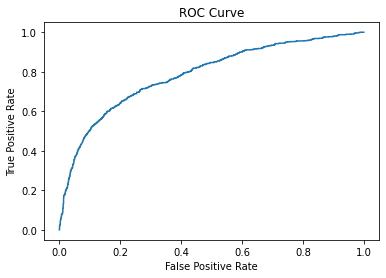

AUC: 0.7862181758788018


In [106]:
# create the roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
auc = roc_auc_score(y_test, y_prob[:, 1])
print('AUC:', auc)

In [151]:
# save the prediction
y_pred = best_model.predict(x_test)


In [152]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2652,  461],
       [ 371,  516]], dtype=int64)

In [208]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = best_model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[2652,  461],
       [ 371,  516]], dtype=int64)

In [168]:
tp, tn, fp, fn = 2652, 516, 371, 461

we will try to find the threshold that maximize the profit by assigning different weight to different classes.

In [190]:
# assign values to false positive and false negative
tp_value= 1000
tn_value = 0
fp_value = 0
fn_value = -5000

In [191]:
y_prob[:,1]

array([0.88805747, 0.44676159, 0.18064735, ..., 0.07438599, 0.14498258,
       0.19608606])

In [210]:
import numpy as np
thresholds = np.sort(np.unique(y_prob))[::-1]
profits = []
for threshold in thresholds:
    y_pred = np.where(y_prob[:,1] > threshold,1,0)
    tp, tn, fp, fn = confusion_matrix(y_test, y_pred).ravel()
    profit = tp_value*tp + tn_value*tn - fp_value*fp - fn_value*fn
    profits.append(profit)

In [211]:
optimal_threshold = thresholds[np.argmax(profits)]

### Question 9

In [213]:
optimal_threshold

0.349759629414144

In [214]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = np.where(y_prob[:,1] > optimal_threshold,1,0)
confusion_matrix(y_test, y_pred)



array([[2267,  846],
       [ 253,  634]], dtype=int64)

In [108]:
# import submission data
submission = pd.read_csv('submission_features.csv')

In [ ]:
submission.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
0,2774,70000.00,2,3,2,22,0,0,0,0,...,37858.00,29660.00,29519.00,29457.00,1726.00,3028.00,1026.00,1195.00,1060.00,1031.00
1,15339,100000.00,2,2,1,38,1,2,0,0,...,15323.00,16268.00,15868.00,16448.00,0.00,1600.00,1500.00,0.00,1000.00,1500.00
2,26485,140000.00,2,1,2,40,1,2,0,0,...,128285.00,123074.00,97382.00,99364.00,0.00,6601.00,5522.00,3200.00,3300.00,3500.00
3,6657,380000.00,2,2,2,27,0,0,-1,0,...,270219.00,3641.00,3717.00,3791.00,0.00,270219.00,131.00,135.00,136.00,76.00
4,7917,100000.00,1,2,2,26,0,0,0,0,...,33680.00,34419.00,37782.00,76185.00,2000.00,2000.00,2000.00,4500.00,40000.00,3000.00


In [109]:
# perform the same preprocessing on the submission data
submission = submission.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

In [ ]:
submission.head()

,LIMIT_BAL,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,PAY_FEBRUARY,PAY_JANUARY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
0,70000.00,0,0,0,0,0,0,52899.00,45758.00,37858.00,29660.00,29519.00,29457.00,1726.00,3028.00,1026.00,1195.00,1060.00,1031.00
1,100000.00,1,2,0,0,2,0,14483.00,13961.00,15323.00,16268.00,15868.00,16448.00,0.00,1600.00,1500.00,0.00,1000.00,1500.00
2,140000.00,1,2,0,0,0,0,143478.00,135633.00,128285.00,123074.00,97382.00,99364.00,0.00,6601.00,5522.00,3200.00,3300.00,3500.00
3,380000.00,0,0,-1,0,0,0,4400.00,0.00,270219.00,3641.00,3717.00,3791.00,0.00,270219.00,131.00,135.00,136.00,76.00
4,100000.00,0,0,0,0,0,0,32186.00,32949.00,33680.00,34419.00,37782.00,76185.00,2000.00,2000.00,2000.00,4500.00,40000.00,3000.00


In [110]:
# transform submission features names to the same as x_test features
submission.columns = x_test.columns
submission.head()

,LIMIT_BAL,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,70000.0,0,0,0,0,0,0,52899.0,45758.0,37858.0,29660.0,29519.0,29457.0,1726.0,3028.0,1026.0,1195.0,1060.0,1031.0
1,100000.0,1,2,0,0,2,0,14483.0,13961.0,15323.0,16268.0,15868.0,16448.0,0.0,1600.0,1500.0,0.0,1000.0,1500.0
2,140000.0,1,2,0,0,0,0,143478.0,135633.0,128285.0,123074.0,97382.0,99364.0,0.0,6601.0,5522.0,3200.0,3300.0,3500.0
3,380000.0,0,0,-1,0,0,0,4400.0,0.0,270219.0,3641.0,3717.0,3791.0,0.0,270219.0,131.0,135.0,136.0,76.0
4,100000.0,0,0,0,0,0,0,32186.0,32949.0,33680.0,34419.0,37782.0,76185.0,2000.0,2000.0,2000.0,4500.0,40000.0,3000.0


In [111]:
x_test.head()

,LIMIT_BAL,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
10650,200000.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2041,210000.0,73634.0,76886.0,78604.0,73903.0,75095.0,72153.0,0.0,0.0,0.0,1.0,0.0,2.0,2687.0,3000.0,3000.0,0.0,3000.0,2674.0
8668,100000.0,78351.0,56016.0,36210.0,85841.0,79030.0,74564.0,0.0,0.0,0.0,0.0,0.0,0.0,3006.0,3000.0,1500.0,4000.0,2023.0,5000.0
1114,130000.0,86004.0,90720.0,87851.0,83521.0,87718.0,84373.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,3323.0,3192.0,3087.0,4355.0,3059.0
13902,50000.0,46665.0,430.0,390.0,37624.0,390.0,44915.0,0.0,-1.0,0.0,0.0,-1.0,0.0,390.0,350.0,3581.0,8000.0,430.0,26390.0


In [112]:
# predict the probability of default
y_prob = best_model.predict_proba(submission)
y_prob

array([[0.23344094, 0.76655906],
       [0.24844428, 0.75155572],
       [0.25780396, 0.74219604],
       ...,
       [0.3092131 , 0.6907869 ],
       [0.24236308, 0.75763692],
       [0.21920506, 0.78079494]])

In [113]:
# create a dataframe with the probability of default
submission_df = pd.DataFrame(y_prob, columns=['PROB_0', 'PROB_1'])
submission_df.head()

,PROB_0,PROB_1
0,0.233441,0.766559
1,0.248444,0.751556
2,0.257804,0.742196
3,0.311910,0.688090
4,0.255273,0.744727


### Question 8

In [114]:
# drop the probability of not default
submission_df = submission_df.drop('PROB_0', axis=1)
submission_df.head()

,PROB_1
0,0.766559
1,0.751556
2,0.742196
3,0.688090
4,0.744727


In [115]:
# create a dataframe with the ID and the probability of default
submission_df = pd.concat([pd.read_csv('submission_features.csv')['ID'], submission_df], axis=1)
submission_df.head()

,ID,PROB_1
0,2774,0.766559
1,15339,0.751556
2,26485,0.742196
3,6657,0.688090
4,7917,0.744727


In [116]:
# find the top 5 ids with the lowest probability of default
submission_df.sort_values(by='PROB_1', ascending=True).head()

,ID,PROB_1
704,8060,0.366033
714,20615,0.368597
266,17239,0.382490
232,16950,0.392202
877,27428,0.398558


In [117]:
# save the dataframe to a csv file
submission_df.to_csv('submission.csv', index=False)

In [ ]:
y_test.value_counts()

0    3113
1     887
Name: DEFAULT_JULY, dtype: int64